# Applied Artificial Intelligence Coursework Submission (Implementation)
##### Name - Vedant Thakur
##### NTU ID - N1288583

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
df_train = pd.read_csv('train/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv('test/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Pre-Processing and Cleaning

In [4]:
df_train.shape

(60000, 785)

In [5]:
df_test.shape

(10000, 785)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [37]:
df_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
# Checking if any pixel column has outliers, pixel ranges from (0,255)
pixel_columns = df_train.columns[1:]
outliers =  (df_train[pixel_columns] > 255).any().any() or (df_train[pixel_columns] < 0).any().any()
print(outliers)

False


In [8]:
# Normalising the pixel values
X_train = df_train.drop('label', axis=1) / 255.0
y_train = df_train['label']

X_test = df_test.drop('label', axis=1) / 255.0
y_test = df_test['label']

In [9]:
# Reshaping data for further use in Deep Learning
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [10]:
# One-Hot Encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#### Visualisations

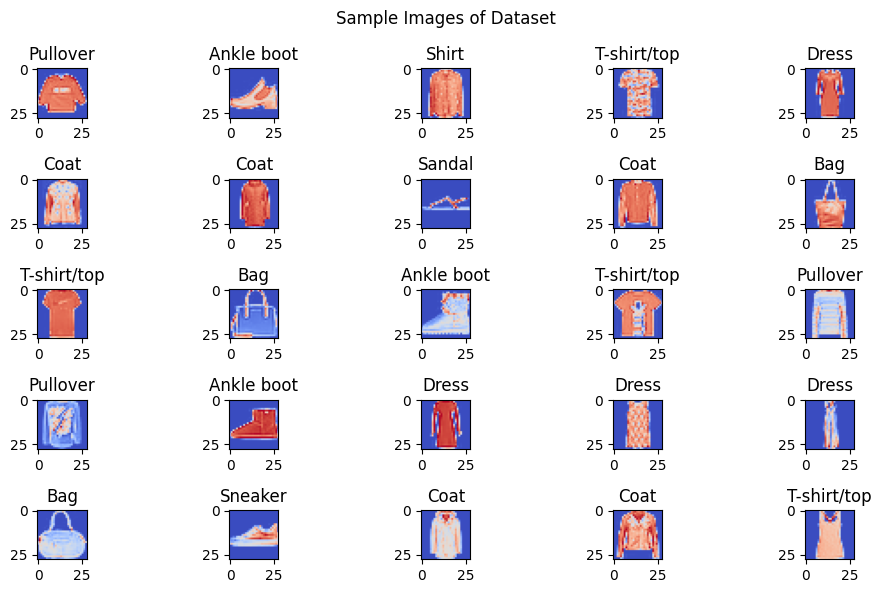

In [11]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = X_train[i].reshape(28, 28)
    plt.imshow(image, cmap='coolwarm')
    plt.title(classes[np.argmax(y_train[i])])
plt.suptitle("Sample Images of Dataset")
plt.tight_layout()
plt.show()

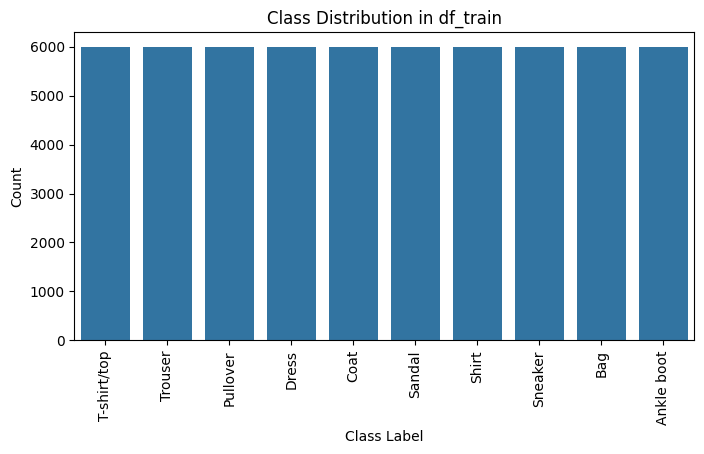

In [12]:
# Classes distribuition in Training Data
y_labels = np.argmax(y_train, axis=1)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_labels)# one-hot labels to class
plt.title("Class Distribution in df_train")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(ticks=range(10), labels=classes, rotation=90)
plt.show()

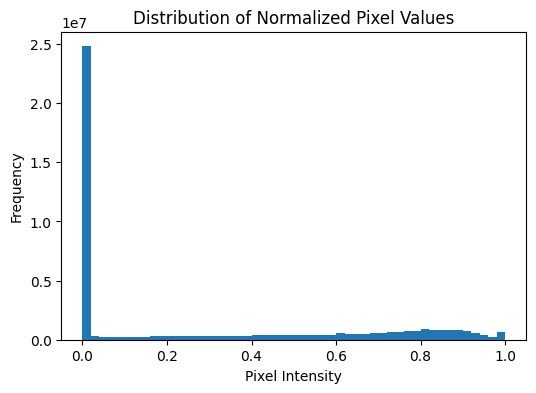

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(X_train.reshape(-1), bins=50)
plt.title("Distribution of Normalized Pixel Values")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

#### TASKS

Task 1: Modify your solution in Task 1 to use a multilayer perceptron (MLP) classifier using scikit-learn with the following parameters: 3 hidden layers, having 30, 15, and 20 neurons respectively.

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [15]:
MLP = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=300, random_state=42)#hidden_layer_sizes(neuron1, neuron2, neuron3)

In [17]:
#flattening training and testing data
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

#one-hot encoded to classes
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

MLP = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=300, random_state=42)#hidden_layer_sizes(neuron1, neuron2, neuron3)
MLP.fit(X_train_flatten,y_train_classes)

MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=300, random_state=42)

In [25]:
y_pred_MLP = MLP.predict(X_test_flatten)
accuracy = accuracy_score(y_test_classes, y_pred_MLP)
print('MLP Classifier Accuracy: {:.2f}%'.format(accuracy * 100))

MLP Classifier Accuracy: 87.35%


Task 2: Implement an ensemble model using sci-kit-learn. Create a subsection in your
report describing the chosen parameters of the ensemble method, training
method, and how they were set

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [28]:
model_RF = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
model_RF.fit(X_train_flatten, y_train_classes)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [29]:
y_pred_RF = model_RF.predict(X_test_flatten)

In [30]:
print(f"Accuracy: {accuracy_score(y_test_classes, y_pred_RF) * 100:.2f}",'%')

Accuracy: 88.46 %


It can be seen using Random Forest Ensemble Method the accuracy of training model is increased. However, the accuracy just increased by a percentange but a small change is enough to state that, The Random Forest model slightly outperforms the MLP model.

Task 3: Replace the classifier model in your program with a deep convolutional neural
network (CNN) with a minimum of 3 convolutional layers using the Keras or
TensorFlow library

In [31]:
# Framing a 4 layered CNN:
# Layer 1: 32 filters (Learns low-level features)
# Layer 2: 64 filters (Learns mid-level features)
# Layer 3: 128 filters (Learns deep spatial features)
# Layer 4: 128 filters (Learns deeper features)

# Adding more layers enables model to capture more complex patterns in the images.

layered_model = Sequential([
    # Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    # Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Layer 3
    Conv2D(128, (3,3), activation='relu'),

    # Layer 4
    Conv2D(128, (3,3), activation='relu'),

    # Fully-Connected Layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
X_test_reshaped = X_test_flatten.reshape(-1, 28, 28, 1)
y_test_classes = to_categorical(y_test_classes, num_classes=10) #classes to one-hot encoded

In [33]:
layered_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
layered_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test_classes))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.6628 - loss: 0.9127 - val_accuracy: 0.8600 - val_loss: 0.3780
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8561 - loss: 0.4071 - val_accuracy: 0.8871 - val_loss: 0.3132
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8843 - loss: 0.3249 - val_accuracy: 0.8988 - val_loss: 0.2744
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.9008 - loss: 0.2776 - val_accuracy: 0.9023 - val_loss: 0.2600
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.9095 - loss: 0.2526 - val_accuracy: 0.9028 - val_loss: 0.2627
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9190 - loss: 0.2211 - val_accuracy: 0.9111 - val_loss: 0.2331
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9252 - loss: 0.2038 - val_accuracy: 0.9143 - val_loss: 0.2352
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9329 - loss: 0.1808 - 

In [35]:
test_loss, test_accuracy = layered_model.evaluate(X_test_reshaped, y_test_classes)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9169 - loss: 0.2340
Accuracy: 91.97%


It is seen after using deep CNN with 4 layers with 32, 64, 128 and 128 filters of 3x3 kernel size and relu as an activation function respectively the accuracy has impressively increased. Using Deep CNN with multiple layers helper capture more detailed informations of images in the dataset.

Task 4: Use a clustering method of your choice to cluster the dataset, and measure
how accurately the clusters correspond to the classes in your dataset. Determine
the optimum number of clusters

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment

In [37]:
X_flat = X_train.reshape(X_train.shape[0], -1)
y_labels = np.argmax(y_train, axis=1)

In [38]:
k_means = KMeans(n_clusters=10, random_state=42)
clusters = k_means.fit_predict(X_flat)

In [39]:
conf_matrix = confusion_matrix(y_labels, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / X_flat.shape[0]

In [40]:
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

Clustering Accuracy: 57.73%


Lets imporve this accuracy by performing PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
X_pca = PCA(n_components=50).fit_transform(X_flat)

In [43]:
clusters = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

In [44]:
conf_matrix = confusion_matrix(y_labels, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / X_flat.shape[0]
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

Clustering Accuracy: 57.98%


As seen there is no such big difference in accuracy even after performing PCA becuase it is linear and doesn't neccessarily discriminate features.
This can be improved if Autoencoders is implemented with KMeans

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [46]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)

In [47]:
# Encoder
encoded = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

In [48]:
# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

In [49]:
# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [50]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.4529 - val_loss: 0.3155
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3138 - val_loss: 0.3043
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3042 - val_loss: 0.2986
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2987 - val_loss: 0.2955
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2957 - val_loss: 0.2927
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2930 - val_loss: 0.2908
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2915 - val_loss: 0.2891
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2904 - val_loss: 0.2873
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2878 - val_loss: 0.2861
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2866 - val_loss: 0.2850
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2859 - val_loss: 0.2845
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [51]:
encoder = Model(inputs=input_img, outputs=encoded)
X_encoded = encoder.predict(X_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Now Autoencoder is implemented and we can use KMeans

In [52]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

In [53]:
conf_matrix = confusion_matrix(y_labels, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / X_train.shape[0]

In [54]:
# Adjusted Rand Index (ARI)
ARI = adjusted_rand_score(y_labels, clusters)

In [55]:
print(f"Autoencoder + KMeans Clustering Accuracy: {accuracy*100:.2f}%")
print(f"Adjusted Rand Index (ARI): {ARI:.2f}")

Autoencoder + KMeans Clustering Accuracy: 40.69%
Adjusted Rand Index (ARI): 0.23


Thank You